In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

# 9C: Signal Denoising by Average 
> <font color='blue'>Learning goals:</font> know how the starting phase effects the averaged signal.

This assignment is based on one of the exam questions of previous years.
Structure of an experiment:
- Background + Anticipate + Simulate (32 min): per person. This is homework and should be finished **before** you start your 4 hours practicum session
- Implement + Investigate (40 min): with your partner(group of 2)
- Compare + Conclude (15 min): with a group of 4 (per table)


## BACKGROUND 
> <font color='grey'>⏳ Estimated time: 2 min</font>

In 9B simulate, you already saw what the trigger can do to the average of noisy signals. Suppose you do have important data, can you do something about the data, perhaps adapt the starting phase to be able to average it easily? In this assignment you'll explore two approaches. 


## ANTICIPATE
> <font color='grey'>⏳ Estimated time: 15 min</font>

If a signal is noisy, you could take multiple acquisitions and then average it.

* Say why simply averaging over noisy untriggered data will not give you usable results.
* Devise a strategy how to handle such data so you can still retrieve the signal using averaging as a denoising technique

In [1]:
### TO DO="your prediction for the resulting signal after averaging"


## SIMULATE
> <font color='grey'>⏳ Estimated time: 15 min</font>

Continuing on the simulation of assignment 9B, run the code and reflect on why these approaches are not the best ones to:
1. find the crossing to zero (for later shift of the signal)
2. shift the signal to be able to average

In [2]:
# part 1: find the zero crossing

import numpy as np
import matplotlib.pyplot as plt
Nsamples = 150
duration = 0.9 # seconds
time = np.linspace(0,duration,Nsamples)
freq1 = 5 # Hz

pp=2.0 * np.pi*np.random.random()
voltage = np.sin( freq1 * 2.0 * np.pi * time+ pp) + 0.7*(np.random.random(len(time))-0.5)

# code for finding the zero crossing
crossing=np.where(voltage==0) #1a does not work ..... why

crossing=np.where(abs(voltage)==min(abs(voltage))) #1b is the slope always in the same direction?

print(crossing)
#print(crossing[0][0])



(array([19], dtype=int64),)


In [3]:
### TO DO="your  answers (you can answer them after seeing the plot in the next cell)"


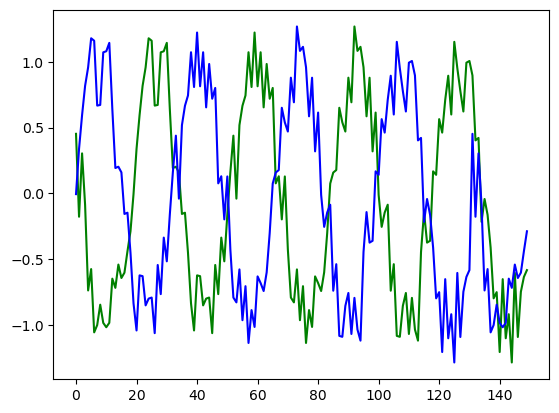

In [4]:
# part 2. code for shifting the signal (and displaying)
new_signal=voltage.copy()

plt.plot(new_signal,'g')
plt.plot(np.roll(new_signal, -round(crossing[0][0])),'b')

* Precap (PyDAQ10 became week 9C, Pydaq11 became week 9B): https://www.youtube.com/watch?v=6Cl2hjsRiOQ


## IMPLEMENT & INVESTIGATE 1 : Simulate an untriggered data measurement and try to average it
> <font color='grey'>⏳ Estimated time: 10 min</font>

If you average triggered data (as collected in the 9B assignment), you can average it without issues. This is different for untriggered data, which we will first simulate. 

**Exercise 1.1**: Run the following code to 'generate' a measurement. You might need to run twice in order to see the plot.<br>
If you ever want to change the code below, COPY IT into a separate cell. Also be aware that after the first time you run it, you will have to delete 'exam_noisy_data_to_average.npy' file to be able to generate again

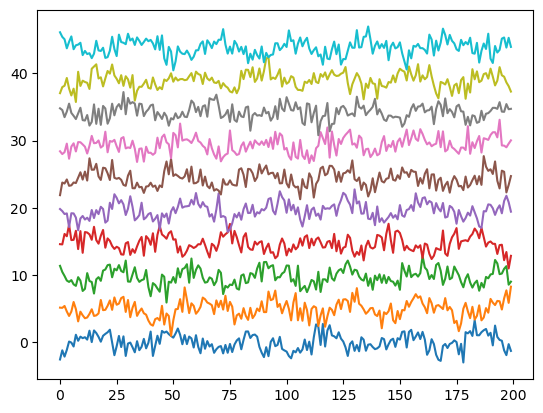

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as npm # this sublibrary needs to be separately loaded
import os

Nrec=1000
tt=np.arange(0,20,0.1)
    
if not(os.path.exists('exam_noisy_data_to_average.npy')):

    AA=np.zeros((len(tt),Nrec))

    for ii in range(Nrec):
        AA[:,ii]=np.sin(2*np.pi*tt/3.4+np.random.randn()*(2*np.pi))+np.random.randn(1,len(tt))
    np.save('exam_noisy_data_to_average',AA)
else: 
    AA=np.load('exam_noisy_data_to_average.npy')

#lenght=ii # or less    
length=10
plt.plot(AA[:,:length]+ np.amax(AA)*npm.repmat(np.arange(0,length),len(tt),1))
plt.show()

This plot shows 10 of the 1000 (simulated) recordings of a very noisy signal. Firstly, we will try to reduce the noise by taking the average of all these recordings. Perhaps, this filters out the noise.

**Exercise 1.2**: Write code to plot the averaged recording AV, and the first (noisy) recording.

> <font color='blue'>Hint:</font>  Note you have 1000 traces of 200 data points. Make sure you average in the right direction.

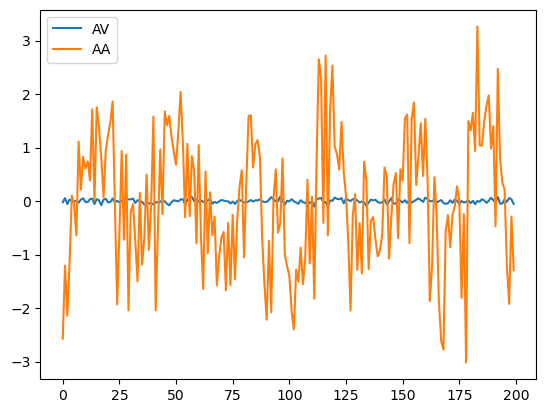

In [7]:
### TO DO="your code, use np.mean(..., axis=...)"
AV=np.mean(..., axis=...)
plt.plot(AV),plt.plot(AA[:,0]), plt.legend(['AV','AA'])
plt.show()

Think about why the blue AV plot is pretty small/ flat (and not a sine with less noise). 


## IMPLEMENT & INVESTIGATE 2: Digital improvement of the data
> <font color='grey'>⏳ Estimated time: 30 min</font>

As you should have seen in the previous question, the phase of each trace is random. Therefore, the resultative average is not a clean signal. You can digitally improve this by aligning the traces to start with the same phase.

<font color='red'>**Optional Challenge**: </font>If you are a die hard, you could try writing the code from scratch.

<font color='red'>**Additional optional challenge**:</font> Improve the code below, and do a comparison (between your from scratch code and the -incompleted- one below). Which code is better and why?

**Exercise 2.1**: Complete, run and understand the code below. Answer the questions in the comments (comments will help you to code) to:
* for each trace find the maximum location,
* move several periods to the left,
* crop the data from that location,
* store it in a new array,
* average the new array after you looped over all traces.

In [8]:
# try out the following function: 
np.remainder(10,3)

1

In [9]:
## your code - understand it (answer the questions), and let it function as wanted

period=34; # 34 is the given period.  Optional challenge: can you deduct it from the data? 

BB=np.zeros((len(tt),Nrec))        # same as AA, why??
for ii in range(...):               # what are you looping over, len(tt) or Nrec?
    maxElement = np.amax(...)       #  of which variable do you want to take the maximum, in order to find the location in the next line
                                   # why do you take the maximum, and not the zero crossing?
    aa=np.where(...== maxElement)   # find the location of maxElement; what where you comparing again?
    aar=np.remainder(aa,period)[0][0]; # this line is correct, but do you understand:
                                       # 1. why remainder is improving the eventual result?
                                       # 2. why do you use [0][0]?
    bb=AA[...,ii];                   # hint: you don't want the full AA, but only a part (starting at phase 0) ..something with aar 
    BB[...,ii]=bb;                   # hint: compare the size of bb and BB[:,ii], they should become the same
    
# the part below is solution code, no need to alter. 
length=20 # you just do not want to plot 1000 traces, so only display a subset 

plt.figure(1), plt.plot(AA[:,:length]+ np.amax(AA)*(npm.repmat(np.arange(0,length),len(tt),1)))
plt.figure(2), plt.plot(BB[:,:length]+ np.amax(AA)*(npm.repmat(np.arange(0,length),len(tt),1)))plt.show()

SyntaxError: invalid syntax (2229949897.py, line 6)

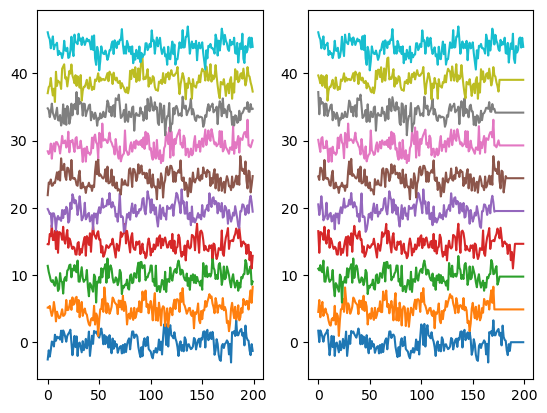

In [10]:
### TO DO="copy the above code and adapt"


Your plots should look like this (just less squished - if you want your plot to be squished, use plt.subplot instead of plt.plot):
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PyDAQ-Next/PyDAQ10_more_aligned_traces.JPG" width=50%></img>

**Exercise 2.2**: Using the code below, plot the two averaged signal and enjoy the great improvement of the aligned / triggered averaging compared to unaligned / nontriggered signals.

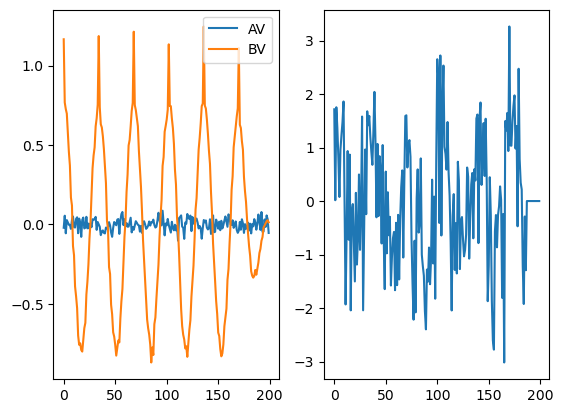

In [12]:
## the ultimate test!
BV=np.mean(BB,axis=1)
plt.subplot(1,2,1), plt.plot(AV), plt.plot(BV), plt.legend(['AV','BV']) # averaged AA and BB
plt.subplot(1,2,2), plt.plot(BB[:,0]) # your phase shifted
plt.savefig('image.jpg') # automatically save with Pillow (pip install Pillow )plt.show()

## COMPARE & CONCLUDE:
> <font color='grey'>⏳ Estimated time: 15 min</font>


* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 

**to be checked by TA** 

Reflect on your predictions and written code:
1. how did you manage to improve the missing alignment of different starting phase?
2. Explain why the signal seems to have strange peaks on top of smooth sine wave. It might have to do with the way we align all signals.
3. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
4. How do think this notebook could be improved

In [ ]:
#9C denoising by averaging
### TO DO= " 1. how did you manage to improve the misalgined phase"

### TO DO= 2. explain the strange peaks on top of the smooth sine wave

### TO DO="3a. abstract"

### TO DO="3b. troubleshooting"

### TO DO="3c. code"

### TO DO="4. what changes would you suggest?"


> <font color='red'> **optional challenge** </font> :

> You could do an even better alignment, if you first remove noise by digital filtering, and then find the maximum. 

> Another option is to do cross-correlation between noisy (or filtered) traces, to find a better estimate of the shift. And then apply a subpixel shift, with functions like scipy.ndimage.shift.

> If you are up to the challenge, feel free to try it.

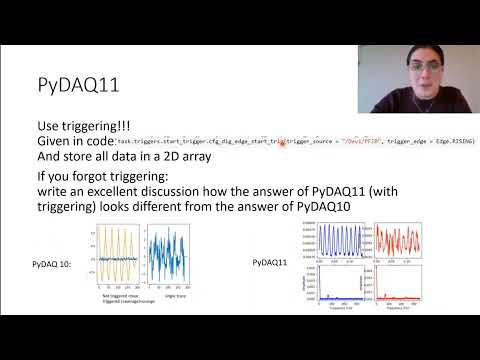

(Text(0.5, 1.0, 'averaged noisy signals'), Text(0.5, 0, 'time [a.u.]'))

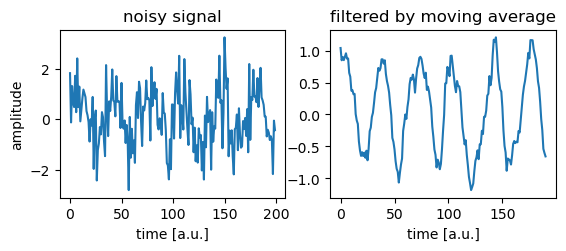

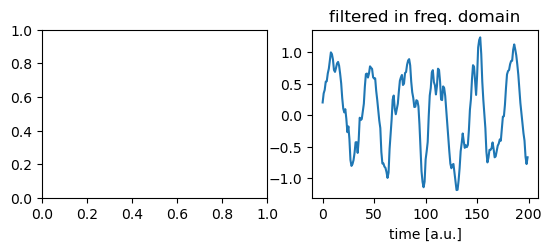

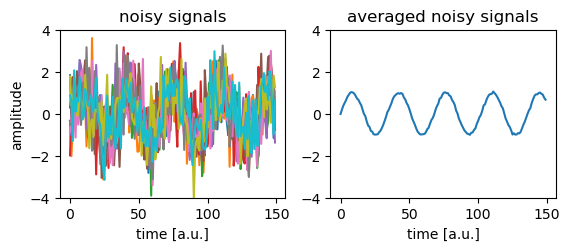

In [55]:
### TO DO ="your code for the optional challenge"
